In [1]:
#importing the necessary libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
from tensorflow.python.framework import ops
print("Tensorflow version " + tf.__version__)
tf.set_random_seed(0)
tf.reset_default_graph()

E:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Tensorflow version 1.12.0


In [2]:
#we will download the mnist dataset through tensorflow itt will be split between mnist.test and mmnist.train containing about
#10k and 50k images each
def load_dataset(flatten=False):
    """mnist = tf.keras.datasets.mnist
    (X_train, Y_train),(X_test, Y_test) = mnist.load_data()
    X_train, X_test = X_train / 255.0,X_test / 255.0
    if flatten:
        X_train=X_train.reshape([X_train.shape[0],-1])
        X_test=X_test.reshape([X_test.shape[0],-1])
    return X_train, Y_train,X_test, Y_test"""
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')
    X, y = mnist["data"], mnist["target"]
    # split, reshape, shuffle
    m = 60000
    m_test = X.shape[0] - m
    X_train, X_test = X[:m], X[m:]
    Y_train, Y_test = y[:m], y[m:]
    return X_train, Y_train,X_test,Y_test

In [3]:
X_train,Y_train,X_test,Y_test=load_dataset()
print("-x-x-x-x-x-x-x-x-x-x-x-x-x-x--x-x-xPrinting the shapes-x-x-x-x-x-x-x-x-x-x-x-x--x-x")
print("The training shape of X is {} and Y is {}".format(X_train.shape, Y_train.shape))
print("The testing shape of X is {} and Y is {}".format(X_test.shape,Y_test.shape))

-x-x-x-x-x-x-x-x-x-x-x-x-x-x--x-x-xPrinting the shapes-x-x-x-x-x-x-x-x-x-x-x-x--x-x
The training shape of X is (60000, 784) and Y is (60000,)
The testing shape of X is (10000, 784) and Y is (10000,)


In [4]:
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
Y_train=lb.fit_transform(Y_train)
Y_test=lb.transform(Y_test)
print('Train labels dimension:');print(Y_train.shape)
print('Test labels dimension:');print(Y_test.shape)


Train labels dimension:
(60000, 10)
Test labels dimension:
(10000, 10)


In [5]:
#designing the placeholders for the X and the Y
def placholder(n_x,n_y,keep_prob):
    #update 1 adding the learning rate decay function
    X=tf.placeholder(tf.float32,shape=[None,n_x],name="X")
    Y=tf.placeholder(tf.float32,shape=[None,n_y],name="Y")
    keep_prob=tf.placeholder(tf.float32,name="keep_prob")
    return X,Y,keep_prob

In [6]:
X,Y,keep_prob=placholder(784,10,0.75)
print("X =" +str(X))
print("Y =" +str(Y))
print("Dropout Probability =" +str(keep_prob))

X =Tensor("X:0", shape=(?, 784), dtype=float32)
Y =Tensor("Y:0", shape=(?, 10), dtype=float32)
Dropout Probability =Tensor("keep_prob:0", dtype=float32)


In [7]:
#Now initialzing the weights which are present
def initialize_params():
    W1=tf.get_variable("W1",[784,200],initializer=tf.contrib.layers.xavier_initializer(),dtype=tf.float32)
    b1=tf.get_variable("b1",[200],initializer=tf.zeros_initializer(),dtype=tf.float32)
    W2=tf.get_variable("W2",[200,100],initializer=tf.contrib.layers.xavier_initializer(),dtype=tf.float32)
    b2=tf.get_variable("b2",[100],initializer=tf.zeros_initializer(),dtype=tf.float32)
    W3=tf.get_variable("W3",[100,70],initializer=tf.contrib.layers.xavier_initializer(),dtype=tf.float32)
    b3=tf.get_variable("b3",[70],initializer=tf.zeros_initializer(),dtype=tf.float32)
    W4=tf.get_variable("W4",[70,40],initializer=tf.contrib.layers.xavier_initializer(),dtype=tf.float32)
    b4=tf.get_variable("b4",[40],initializer=tf.zeros_initializer(),dtype=tf.float32)
    W5=tf.get_variable("W5",[40,10],initializer=tf.contrib.layers.xavier_initializer(),dtype=tf.float32)
    b5=tf.get_variable("b5",[10],initializer=tf.zeros_initializer(),dtype=tf.float32)
    
    parameters={"W1":W1,"b1":b1,"W2":W2,"b2":b2,"W3":W3,"b3":b3,"W4":W4,"b4":b4,"W5":W5,"b5":b5}
    
    return parameters

In [8]:
tf.reset_default_graph()
X,Y,keep_prob=placholder(784,10,0.75) 
parameters=initialize_params()
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print(".........")
print("W5 = " + str(parameters["W5"]))
print("b5 = " + str(parameters["b5"]))

W1 = <tf.Variable 'W1:0' shape=(784, 200) dtype=float32_ref>
b1 = <tf.Variable 'b1:0' shape=(200,) dtype=float32_ref>
.........
W5 = <tf.Variable 'W5:0' shape=(40, 10) dtype=float32_ref>
b5 = <tf.Variable 'b5:0' shape=(10,) dtype=float32_ref>


In [9]:
def feed_forward(X,parameters,keep_prob):
    cache={}
    Z1=tf.add((tf.matmul(X,parameters["W1"])),parameters["b1"])
    A1=tf.nn.relu(Z1)
    A1d=tf.nn.dropout(A1,keep_prob)
    Z2=tf.add((tf.matmul(A1d,parameters["W2"])),parameters["b2"])
    A2=tf.nn.relu(Z2)
    A2d=tf.nn.dropout(A2,keep_prob)
    Z3=tf.add((tf.matmul(A2d,parameters["W3"])),parameters["b3"])
    A3=tf.nn.relu(Z3)
    #A3d=tf.nn.dropout(A3,keep_prob)
    Z4=tf.add((tf.matmul(A3,parameters["W4"])),parameters["b4"])
    A4=tf.nn.relu(Z4)
    #A4d=tf.nn.dropout(A4,keep_prob)
    Z5=tf.add((tf.matmul(A4,parameters["W5"])),parameters["b5"])
    
    return Z5

In [10]:
tf.reset_default_graph()
with tf.Session() as sess:
    X,Y,keep_prob=placholder(784,10,0.75)
    parameters=initialize_params()
    Z5=feed_forward(X,parameters,keep_prob)
print(Z5)

Tensor("Add_4:0", shape=(?, 10), dtype=float32)


In [11]:
def compute_cost_tf(Z5,Y):
    """
    Computes the cost
    
    Arguments:
    Z3 -- output of forward propagation (output of the last LINEAR unit), of shape (6, number of examples)
    Y -- "true" labels vector placeholder, same shape as Z3
    
    Returns:
    cost - Tensor of the cost function
    """ 
    cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=Z5,labels=Y))
    
    return cost

In [12]:
tf.reset_default_graph()
with tf.Session() as sess:
    X,Y,keep_prob=placholder(784,10,0.75)
    parameters=initialize_params()
    Z5=feed_forward(X,parameters,keep_prob)
    cost=compute_cost_tf(Z5,Y)
print(cost)

Tensor("Mean:0", shape=(), dtype=float32)


In [13]:
def random_mini_batches(X, Y,seed, mini_batch_size = 64):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    mini_batch_size - size of the mini-batches, integer
    seed -- this is only for the purpose of grading, so that you're "random minibatches are the same as ours.
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    #The Code is Transformed for m,n_x Case#
    
    m = X.shape[0]                  # number of training examples
    mini_batches = []
    np.random.seed(seed)
    
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[permutation,:]
    shuffled_Y = Y[permutation,:].reshape((m,Y.shape[1]))

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[k * mini_batch_size : k * mini_batch_size + mini_batch_size,:]
        mini_batch_Y = shuffled_Y[k * mini_batch_size : k * mini_batch_size + mini_batch_size,:]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[num_complete_minibatches * mini_batch_size : m,:]
        mini_batch_Y = shuffled_Y[num_complete_minibatches * mini_batch_size : m,:]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [14]:
def nn_model(X_train,Y_train,X_test,Y_test,learning_rate,num_epochs,dropout_prob,mini_batch_size=64,print_cost=True):
    #initializing the shapes
    print(X_train.shape)
    (m,n_x)=X_train.shape
    (n_y)=Y_train.shape[1]
    seed=3
    ops.reset_default_graph()
    costs=[]
    #Initializing all the placeholders
    global_step = tf.Variable(0, trainable=False)
    X,Y,keep_prob=placholder(n_x,n_y,dropout_prob)

    #Now the weights initialization
    parameters=initialize_params()
    
    #The forward propagation
    Z5=feed_forward(X,parameters,keep_prob)
    
    #The cost which we have got
    cost=compute_cost_tf(Z5,Y)
    
    #The learning rate decay parameter
    lr = tf.train.exponential_decay(learning_rate, global_step,decay_steps=2000,decay_rate=0.96, staircase=True)
    
    #Defining the optimizer
    optimizer=tf.train.AdamOptimizer(learning_rate=lr,beta1=0.98,beta2=0.999,epsilon=1e-08,name="Adam").minimize(cost,global_step)
    
    #The variable initialization part
    init=tf.global_variables_initializer()
    
    with tf.Session() as sess:
        sess.run(init)
        print("----------------Initialized--------------------------")
        print("The algorithm will be run for {} epochs".format(num_epochs))
        for epoch in range(num_epochs+1):
            epoch_cost=0
            num_of_mini_batches=int(m/mini_batch_size)
            seed=seed+1
            minibatches = random_mini_batches(X_train, Y_train,seed,mini_batch_size = 64)
            for minibatch in minibatches:
                (minibatch_X, minibatch_Y) = minibatch
                _,minibatchcost=sess.run([optimizer,cost],feed_dict={X: minibatch_X,Y: minibatch_Y,keep_prob:dropout_prob})
                epoch_cost+=minibatchcost/num_of_mini_batches
            if print_cost == True and epoch % 100 == 0:
                print ("The cost for Epoch {} is {} with dropout probability {}".format(epoch, epoch_cost,dropout_prob))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
        print("---------------------------ModelTrained-----------------------")
        
        print("The Cost vs Iteration curve is -")
        
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title(" Initial Learning rate =" + str(learning_rate))
        plt.show()
        
        print("Saving The Parameters!------")
        
        parameters=sess.run(parameters)        
        correct_prediction = tf.equal(tf.argmax(Z5,1), tf.argmax(Y,1))
        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        print("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train,keep_prob:dropout_prob}))
        print("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test,keep_prob:1.0}))

        return parameters
        


(60000, 784)
----------------Initialized--------------------------
The algorithm will be run for 1000 epochs
The cost for Epoch 0 is 1.8286672783508608 with dropout probability 0.75
The cost for Epoch 100 is 0.05642353098104256 with dropout probability 0.75
The cost for Epoch 200 is 0.03891341548144427 with dropout probability 0.75
The cost for Epoch 300 is 0.03622848109522061 with dropout probability 0.75
The cost for Epoch 400 is 0.03550568100566245 with dropout probability 0.75
The cost for Epoch 500 is 0.03821263351882897 with dropout probability 0.75
The cost for Epoch 600 is 0.03677115611563778 with dropout probability 0.75
The cost for Epoch 700 is 0.03298245175793044 with dropout probability 0.75
The cost for Epoch 800 is 0.03560356515198305 with dropout probability 0.75
The cost for Epoch 900 is 0.03447889452522473 with dropout probability 0.75
The cost for Epoch 1000 is 0.035629318209829446 with dropout probability 0.75
---------------------------ModelTrained-----------------

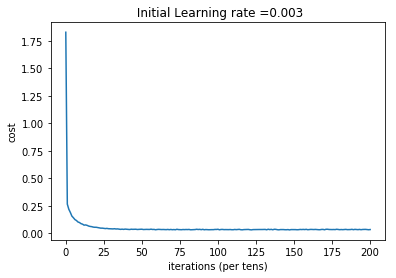

Saving The Parameters!------
Train Accuracy: 0.99093336
Test Accuracy: 0.9699


In [15]:
parameters=nn_model(X_train,Y_train,X_test,Y_test,learning_rate=0.003,num_epochs=1000,dropout_prob=0.75)